**ANALYZING WEATHER DATA FROM ncdc.noaaa.gov**

In [44]:
import math
import collections
import numpy as np
import pandas as pd
import matplotlib.pyplot as pp
import urllib
%matplotlib inline

In [45]:
urllib.request.urlretrieve('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/readme.txt', 'readme.txt')

('readme.txt', <http.client.HTTPMessage at 0x7fc03cf40a30>)

In [46]:
urllib.request.urlretrieve('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/ghcnd-stations.txt', 'stations.txt')

('stations.txt', <http.client.HTTPMessage at 0x7fc055b64e80>)

|Variable|Columns|Type|
|:----:|:----:|:----:|
|ID|            1-11|   Character|
|LATITUDE|     13-20|   Real|
|LONGITUDE|    22-30|   Real|
|ELEVATION|    32-37|   Real|
|STATE|        39-40|   Character|
|NAME|         42-71|   Character|
|GSN FLAG|     73-75|   Character|
|HCN/CRN FLAG| 77-79|   Character|
|WMO ID|       81-85|   Character|


In [47]:
stations = np.genfromtxt("stations.txt", delimiter = [11,9,10,7,3,31,4,4,6],
                                        names = ['id','latitude','longitude','elevation','state','name','gsn','hcn','wmo'],
                                        dtype = ['U11','d','d','d','U3','U31','U4','U4','U6'],
                                        autostrip = True)
len(stations)

117839

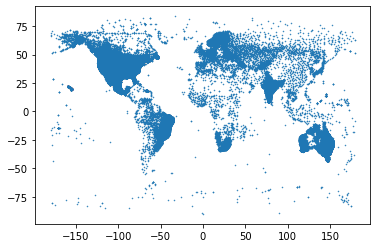

In [48]:
pp.plot(stations['longitude'],stations['latitude'],'.',markersize=1)

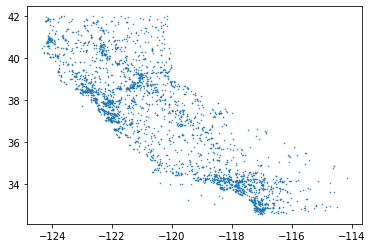

In [49]:
stations_ca = stations[stations['state']=="CA"]
pp.plot(stations_ca['longitude'],stations_ca['latitude'],'.',markersize=1)

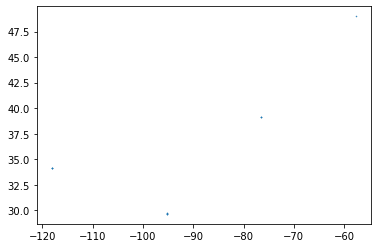

In [50]:
stations_pasadena = stations[np.char.find(stations['name'],'PASADENA')==0]
pp.plot(stations_pasadena['longitude'],stations_pasadena['latitude'],'.',markersize=1)

In [51]:
stations_pasadena

array([('CA1NL000026', 49.0094,  -57.5849,  52.4, 'NL', 'PASADENA 0.5 SE', '', '', ''),
       ('US1CALA0036', 34.1392, -118.1161, 225.2, 'CA', 'PASADENA 2.0 SE', '', '', ''),
       ('US1CALA0043', 34.1619, -118.1073, 277.7, 'CA', 'PASADENA 1.8 E', '', '', ''),
       ('US1CALA0091', 34.1648, -118.1249, 289. , 'CA', 'PASADENA 0.8 ENE', '', '', ''),
       ('US1MDAA0010', 39.1038,  -76.5443,  13.1, 'MD', 'PASADENA 0.7 SE', '', '', ''),
       ('US1MDAA0013', 39.1263,  -76.5596,  18.9, 'MD', 'PASADENA 1.1 NNW', '', '', ''),
       ('US1MDAA0039', 39.0916,  -76.5112,  10.7, 'MD', 'PASADENA 2.6 ESE', '', '', ''),
       ('US1TXHRR076', 29.6471,  -95.1895,  10.7, 'TX', 'PASADENA 2.4 WSW', '', '', ''),
       ('US1TXHRR084', 29.6339,  -95.1881,  11.9, 'TX', 'PASADENA 2.8 SW', '', '', ''),
       ('US1TXHRR093', 29.6849,  -95.2197,   9.1, 'TX', 'PASADENA 4.4 WNW', '', '', ''),
       ('US1TXHRR094', 29.6746,  -95.2104,   9.1, 'TX', 'PASADENA 3.6 WNW', '', '', ''),
       ('USC00046719', 34.1

Get the Pasadena station data 

In [52]:
urllib.request.urlretrieve('https://www1.ncdc.noaa.gov/pub/data/ghcn/daily/all/USC00046719.dly','pasadena.dly')

('pasadena.dly', <http.client.HTTPMessage at 0x7fc040c99400>)

Import provided code that ingests this dataset

In [53]:
import getweather
help(getweather.getyear)

Help on function getyear in module getweather:

getyear(station_name, elements, year)
    Make a NumPy record array of length 365, containing weather data
    at station_name for the list of requested elements (TMIN/TMAX/PRCP/SNOW),
    restricted to year.
    
    If station_name is not in the list, find a station that _begins_
    with station_name, but give precedence to HCN and GSN stations.



In [54]:
pasadena = getweather.getyear("PASADENA",['TMIN','TMAX'],2000)
np.mean(pasadena["TMIN"]),np.min(pasadena["TMIN"]),np.max(pasadena["TMIN"])

(nan, nan, nan)

Get count of nans

In [55]:
np.sum(np.isnan(pasadena["TMIN"]))

8

Numpy functions that ignore nan

In [56]:
np.nanmean(pasadena["TMIN"]),np.nanmin(pasadena["TMIN"]),np.nanmax(pasadena["TMIN"])

(12.069187675070028, 2.8, 21.7)

Replacing NANs in numpy arrays

In [58]:
pasadena["TMIN"][np.isnan(pasadena["TMIN"])] = np.nanmean(pasadena["TMIN"])
pasadena["TMAX"][np.isnan(pasadena["TMAX"])] = np.nanmean(pasadena["TMAX"])
np.sum(np.isnan(pasadena["TMIN"])),np.sum(np.isnan(pasadena["TMAX"]))

(0, 0)

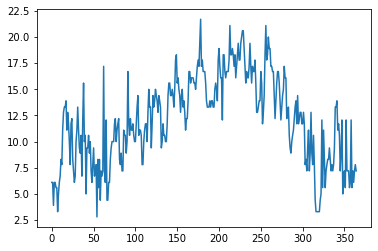

In [59]:
pp.plot(pasadena["TMIN"])

You can deal with missing values by interpolating the values from the neighbors

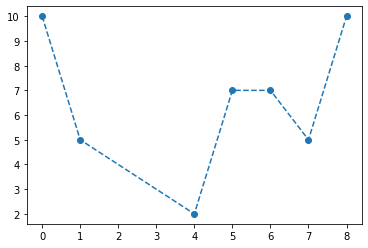

In [67]:
xdata = np.array([0,1,4,5,6,7,8],"d")
ydata = np.array([10,5,2,7,7,5,10],"d")
pp.plot(xdata,ydata,"--o")

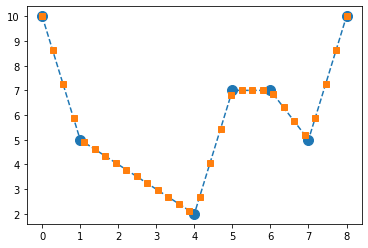

In [70]:
xnew = np.linspace(0,8,30)
ynew = np.interp(xnew, xdata, ydata)
pp.plot(xdata,ydata,"--o", ms=10)
pp.plot(xnew,ynew,"s")

Now let's load Pasadena data, remove nans, interpolate to show 365 days of min temp

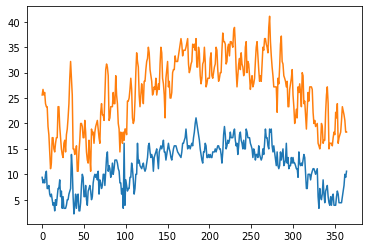

In [75]:
pasadena = getweather.getyear("PASADENA",['TMIN','TMAX'],2001)

def fillnans(array):
    good = ~np.isnan(array)
    x = np.arange(0,365)
    return np.interp(x,x[good],array[good])

pp.plot(fillnans(pasadena["TMIN"]))
pp.plot(fillnans(pasadena["TMAX"]))

**Now we smooth the time series**

In [77]:
hilo = getweather.getyear("HILO",['TMIN','TMAX'],2001)

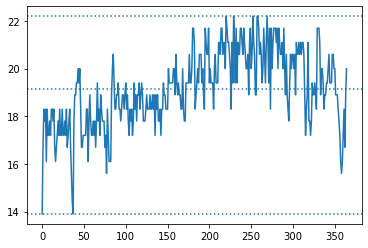

In [81]:
hilo["TMIN"],hilo["TMAX"] = fillnans(hilo["TMIN"]),fillnans(hilo["TMAX"])
pp.plot(hilo["TMIN"])
for value in [np.mean(hilo["TMIN"]),np.min(hilo["TMIN"]),np.max(hilo["TMIN"])]:
    pp.axhline(value,linestyle=":")

Calculating mean and standard deviation

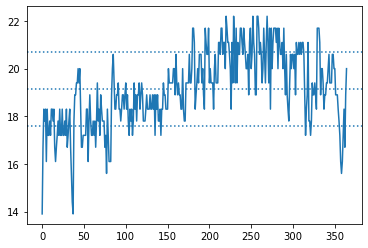

In [83]:
pp.plot(hilo["TMIN"])
mean, err = np.mean(hilo["TMIN"]), math.sqrt(np.var(hilo["TMIN"]))
for value in [mean, mean - err, mean + err]:
    pp.axhline(value,linestyle=":")

Get and look at precipitation data

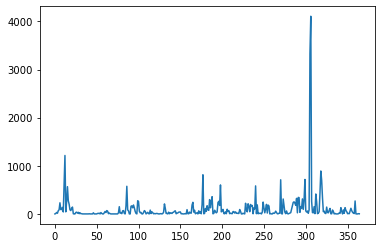

In [85]:
rain = getweather.getyear('HILO', ['PRCP'], 2000)['PRCP']
pp.plot(rain)

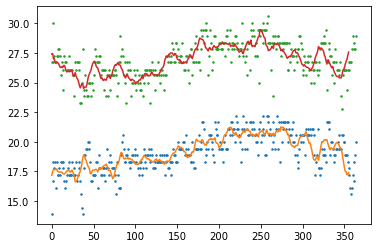

In [95]:
def smooth(window, array):
    return np.correlate(array, np.ones(window)/window, 'valid')
    
    
pp.plot(hilo['TMIN'],'.',ms =3)
pp.plot(smooth(10, hilo['TMIN']))

pp.plot(hilo['TMAX'],'.',ms =3)
pp.plot(smooth(10, hilo['TMAX']))

def smooth_station(station, year):
    data = getweather.getyear(station, ['TMIN','TMAX'], year)
    for obs in ['TMIN','TMAX']:
        data[obs] = fillnans(data[obs])
        
        pp.plot(data[obs],'.',ms =1)
        pp.plot(smooth(20, data[obs]))
    pp.title(station)
    pp.axis(xmin = 1, xmax = 365,ymin = 10, ymax = 45)


(1.0, 365.0, 10.0, 30.0)

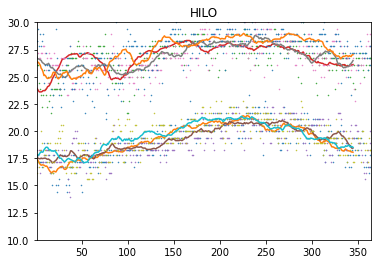

In [97]:
smooth_station('HILO', 2000)
smooth_station('HILO', 2001)
smooth_station('HILO', 2002)
pp.axis(ymax = 30, ymin =10)

Using ('USW00023188', 32.7336, -117.1831, 4.6, 'CA', 'SAN DIEGO LINDBERGH FLD', 'GSN', '', '72290').


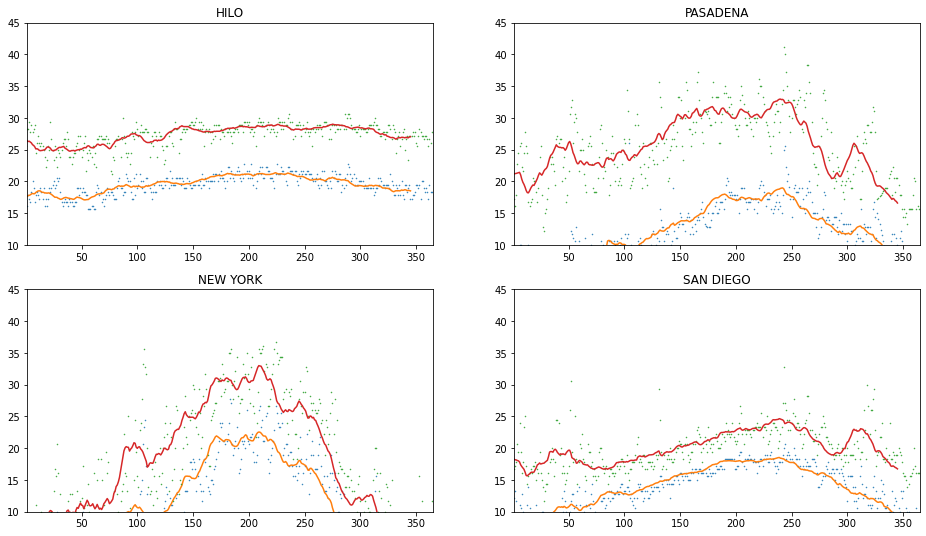

In [99]:
pp.figure(figsize=(16,9))

for i, city in enumerate(['HILO', 'PASADENA', 'NEW YORK','SAN DIEGO']):
    pp.subplot(2,2,i+1)
    smooth_station(city, 2002)

**Let's build another chart!**

In [127]:
def nytimesplot(station, year):
    allyears = np.vstack([getweather.getyear(station,['TMIN','TMAX'],year)
                          for year in range(1910,2019)])
    #pp.matshow(allyears['TMIN'], extent =[1,365,2019,1910])
    #pp.colorbar()
    tmin_record = np.nanmin(allyears['TMIN'], axis = 0)
    tmax_record = np.nanmax(allyears['TMAX'], axis = 0)
    #pp.plot(tmin_record)
    #pp.plot(tmax_record)
    normal = np.vstack([getweather.getyear(station,['TMIN','TMAX'],year)
                      for year in range(1981,2019)])
    normal_tmin_record = np.nanmin(normal['TMIN'], axis = 0)
    normal_tmax_record = np.nanmax(normal['TMAX'], axis = 0)
    #pp.plot(normal_tmin_record)
    #pp.plot(normal_tmax_record)
    thisyear = getweather.getyear(station, ['TMIN','TMAX'], year)
    days = np.arange(1,366)
    #pp.fill_between(days, thisyear['TMIN'], thisyear['TMAX'])
    avg = (np.nanmean(thisyear['TMIN']) + np.nanmean(thisyear['TMAX']))/2
    title = f'{station}, {year}: Average Temp = {avg:.2f} C'
    pp.figure(figsize = (16,9))
    pp.fill_between(days, tmin_record, tmax_record, color = (0.92,0.92, 0.89), step="mid")
    pp.fill_between(days, normal_tmin_record, normal_tmax_record, color = (0.78, 0.72, 0.72))
    pp.fill_between(days, thisyear['TMIN'], thisyear['TMAX'], color=(0.73, 0.21, 0.41), alpha=0.6, step="mid")
    pp.axis(xmin = 1, xmax = 365, ymin = -15, ymax = 50)
    pp.title(title)
    

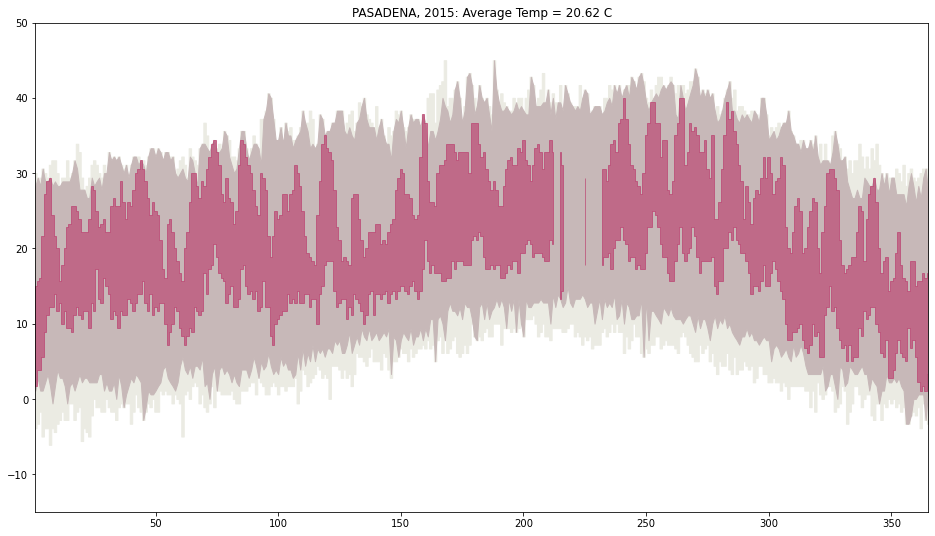

In [128]:
nytimesplot('PASADENA', 2015)

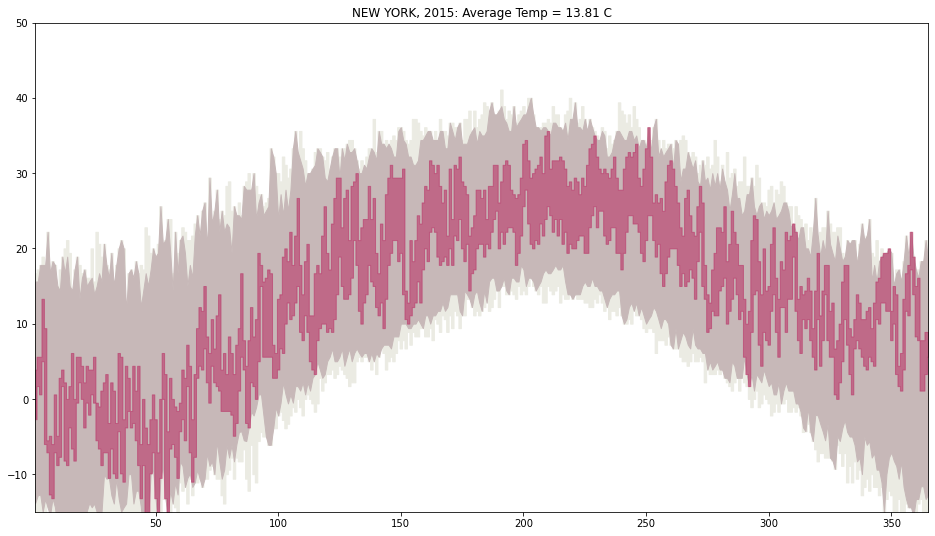

In [129]:
nytimesplot('NEW YORK',2015)

**CHALLENGE!**
* Calculate the midcentury average for a city
* For each year that is available, compare the average temperature to the midcentury average

<ipython-input-169-a53df0111da5>:8: RuntimeWarning: Mean of empty slice
  avg_all = np.nanmean(0.5 * (allyears['TMIN'] + allyears['TMAX']), axis = 1)


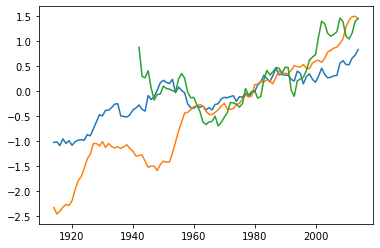

In [169]:
def getAnamoloies(station):
    allyears = np.vstack([getweather.getyear(station,['TMIN','TMAX'],year)
                          for year in range(1910,2019)])
    midcentury = np.vstack([getweather.getyear(station,['TMIN','TMAX'],year)
                          for year in range(1945,1955)])


    avg_all = np.nanmean(0.5 * (allyears['TMIN'] + allyears['TMAX']), axis = 1)
    avg_mid = np.nanmean(avg_all[65:75])
    pp.plot(np.arange(1910,2019)[4:-4], smooth(9,avg_all-avg_mid))

    
getAnamoloies('NEW YORK')
getAnamoloies('PASADENA')
getAnamoloies('MINNEAPOLIS')